In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np



# Assuming 'clinical ppf.csv' contains your dataset
data = pd.read_csv('clinical ppf.csv')

# Generate some example data
num_samples = 1000
num_features = 10
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, size=(num_samples,))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (assuming 1 timestep and num_features features per timestep)
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, num_features)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=225, batch_size=32, validation_split=0.2)


Epoch 1/225
20/20 [==============================] - 2s 22ms/step - loss: 0.6937 - accuracy: 0.4969 - val_loss: 0.6929 - val_accuracy: 0.5250
Epoch 2/225
20/20 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.4969 - val_loss: 0.6935 - val_accuracy: 0.5063
Epoch 3/225
20/20 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5328 - val_loss: 0.6942 - val_accuracy: 0.4688
Epoch 4/225
20/20 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5266 - val_loss: 0.6945 - val_accuracy: 0.4500
Epoch 5/225
20/20 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5312 - val_loss: 0.6945 - val_accuracy: 0.4938
Epoch 6/225
20/20 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5484 - val_loss: 0.6951 - val_accuracy: 0.4625
Epoch 7/225
20/20 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5125 - val_loss: 0.6942 - val_accuracy: 0.5500
Epoch 8/225


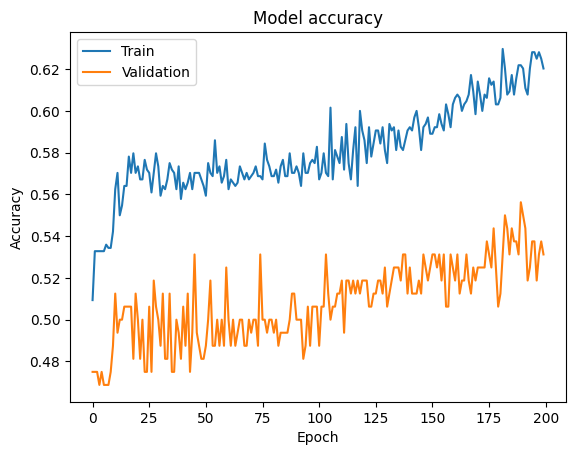

In [7]:
import matplotlib.pyplot as plt  
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
from sklearn.metrics import precision_score

# Assuming 'model' is your trained LSTM model and 'X_test' is your test data
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

7/7 [==============================] - 0s 1ms/step
Precision: 0.6101694915254238


In [9]:
from sklearn.metrics import recall_score

# Assuming 'model' is your trained LSTM model and 'X_test' is your test data
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

7/7 [==============================] - 0s 2ms/step
Recall: 0.3050847457627119


In [10]:
from sklearn.metrics import f1_score

# Assuming 'model' is your trained LSTM model and 'X_test' is your test data
y_pred = model.predict(X_test_reshaped)
y_pred_binary = (y_pred > 0.5).astype(int)

f1 = f1_score(y_test, y_pred_binary)
print("F1 score:", f1)

7/7 [==============================] - 0s 2ms/step
F1 score: 0.4067796610169492


In [11]:
from sklearn.metrics import mean_squared_error

# Assuming 'model' is your trained LSTM model and 'X_test' is your test data
y_pred = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

7/7 [==============================] - 0s 1ms/step
Mean Squared Error: 0.2729385583731745


In [12]:
from sklearn.metrics import mean_absolute_error

# Assuming 'model' is your trained LSTM model and 'X_test' is your test data
y_pred = model.predict(X_test_reshaped)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

7/7 [==============================] - 0s 1ms/step
Mean Absolute Error: 0.5099012351036072


7/7 [==============================] - 0s 1ms/step
Epoch 1: Precision=0.6206896551724138, Recall=0.3050847457627119, F1=0.4090909090909091, MAE=0.5104717710614204, MSE=0.27376575851522633
7/7 [==============================] - 0s 1ms/step
Epoch 2: Precision=0.6231884057971014, Recall=0.3644067796610169, F1=0.45989304812834225, MAE=0.5057483893632889, MSE=0.26773088854368554
7/7 [==============================] - 0s 1ms/step
Epoch 3: Precision=0.6382978723404256, Recall=0.2542372881355932, F1=0.36363636363636365, MAE=0.5131490582227707, MSE=0.2777733107118421
7/7 [==============================] - 0s 995us/step
Epoch 4: Precision=0.6176470588235294, Recall=0.3559322033898305, F1=0.45161290322580644, MAE=0.506903199404478, MSE=0.26884948557309324
7/7 [==============================] - 0s 1ms/step
Epoch 5: Precision=0.6101694915254238, Recall=0.3050847457627119, F1=0.4067796610169492, MAE=0.5102112497389316, MSE=0.27352256637369426
7/7 [==============================] - 0s 1ms/step
Epoch 

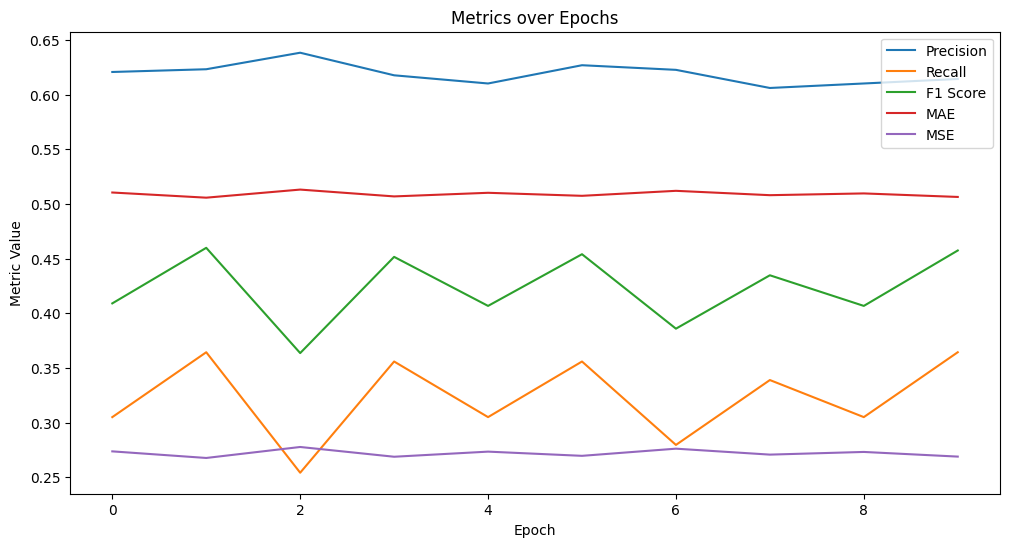

In [13]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

# Define the number of epochs
epochs = 10  # For example, train for 10 epochs

# Define lists to store metrics for each epoch
precisions = []
recalls = []
f1_scores = []
maes = []
mses = []

# Assume 'model' is your LSTM model
# Assume 'X_train_reshaped', 'y_train', 'X_test_reshaped', 'y_test' are defined

for epoch in range(epochs):
    history = model.fit(X_train_reshaped, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=0)
    
    # Calculate metrics for this epoch
    y_pred = model.predict(X_test_reshaped)
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Append metrics to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    maes.append(mae)
    mses.append(mse)
    
    print(f"Epoch {epoch+1}: Precision={precision}, Recall={recall}, F1={f1}, MAE={mae}, MSE={mse}")

# Plot metrics over epochs if desired
plt.figure(figsize=(12, 6))
plt.plot(precisions, label='Precision')
plt.plot(recalls, label='Recall')
plt.plot(f1_scores, label='F1 Score')
plt.plot(maes, label='MAE')
plt.plot(mses, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Metrics over Epochs')
plt.legend()
plt.show()